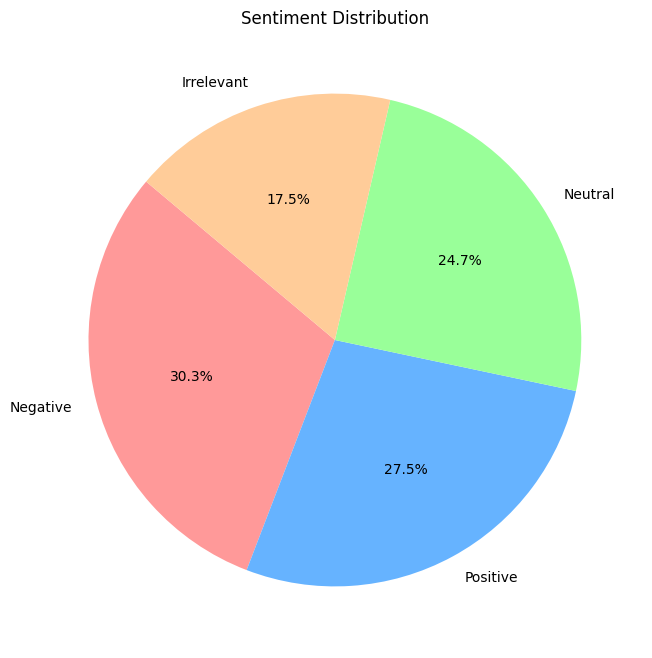

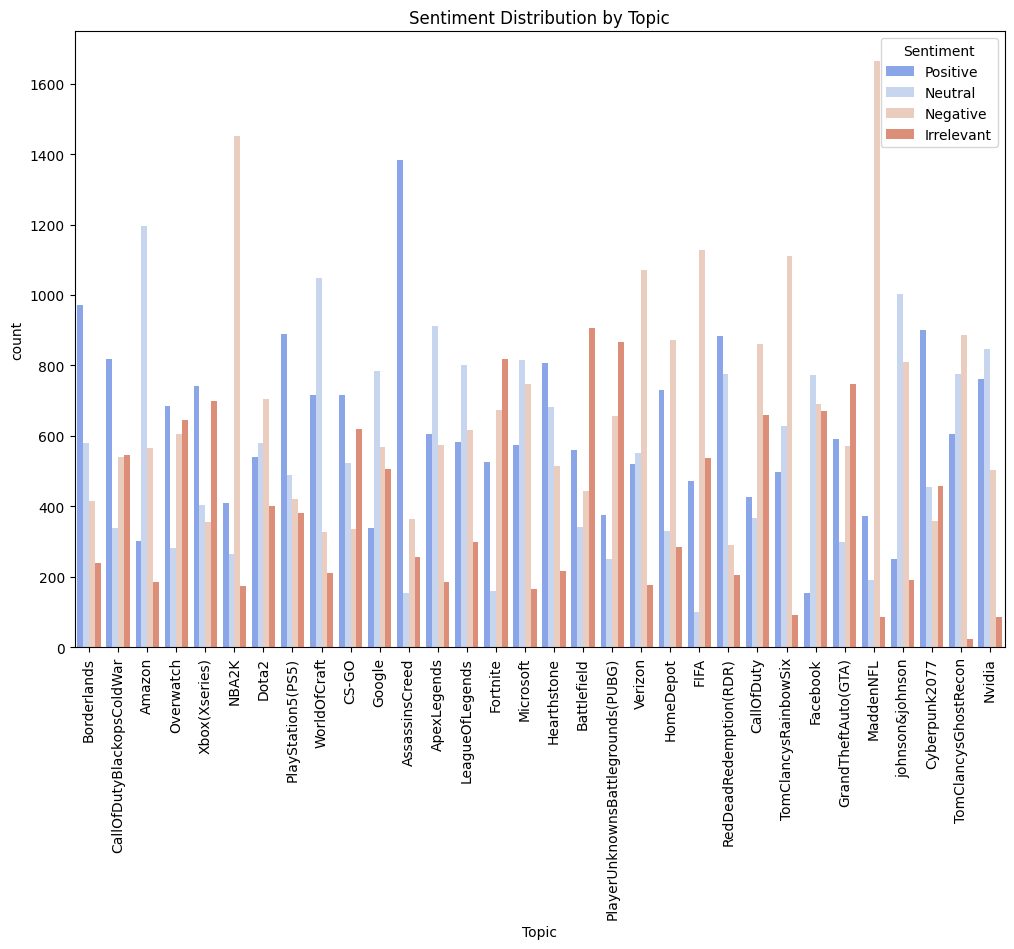

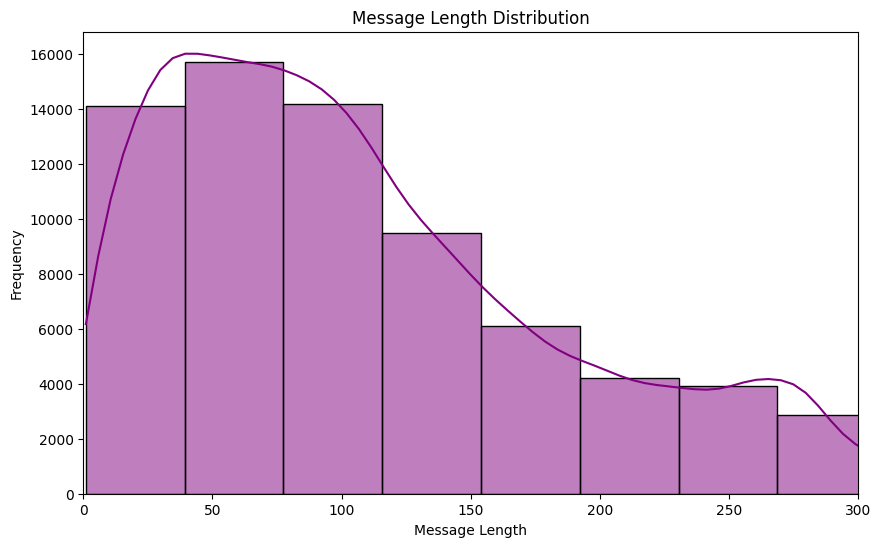

C:\Users\avina\AppData\Local\Temp\ipykernel_15112\702674822.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='msg_len', data=df, palette='Set2')


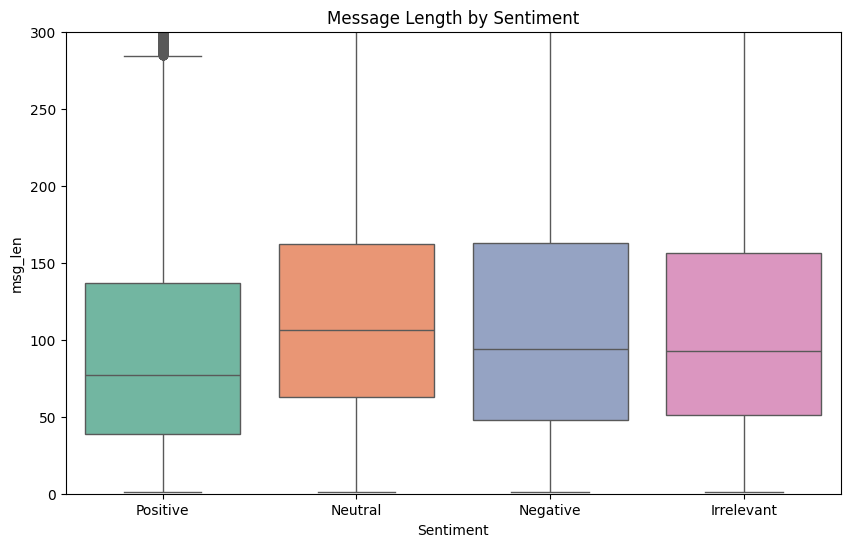

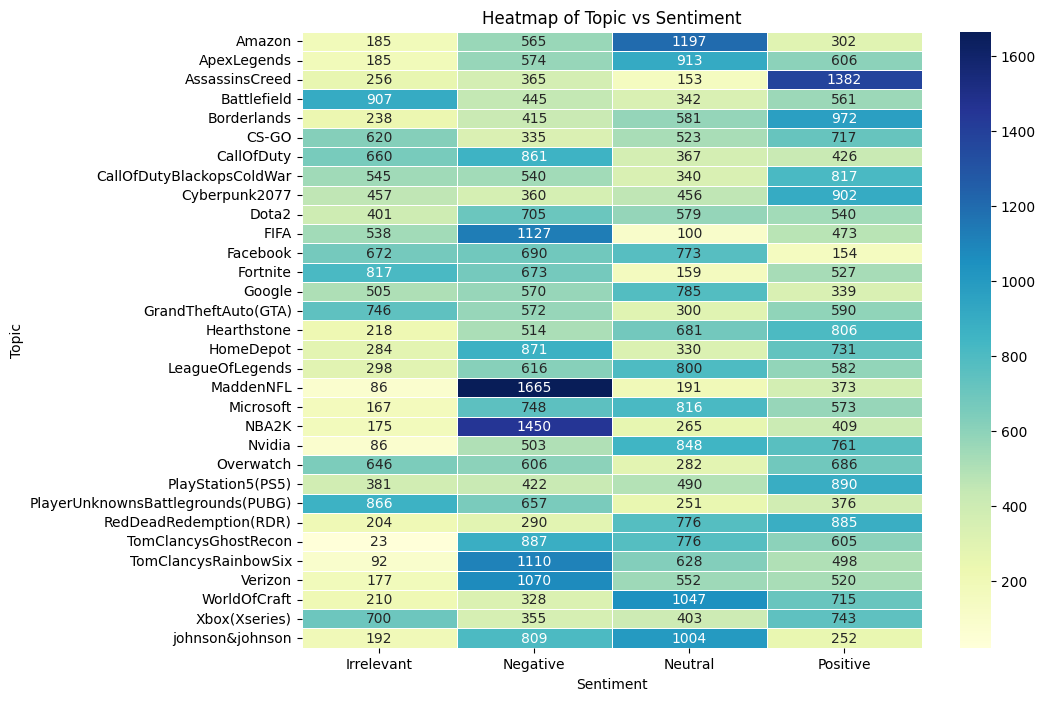

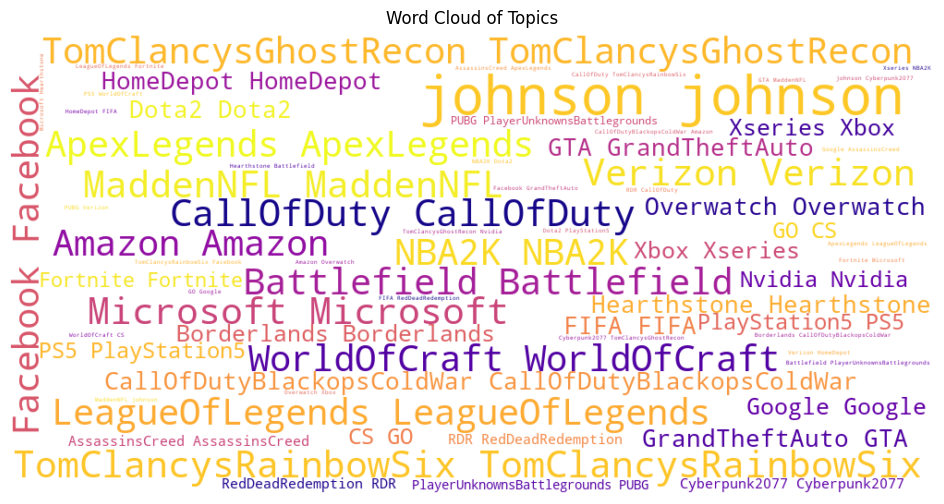

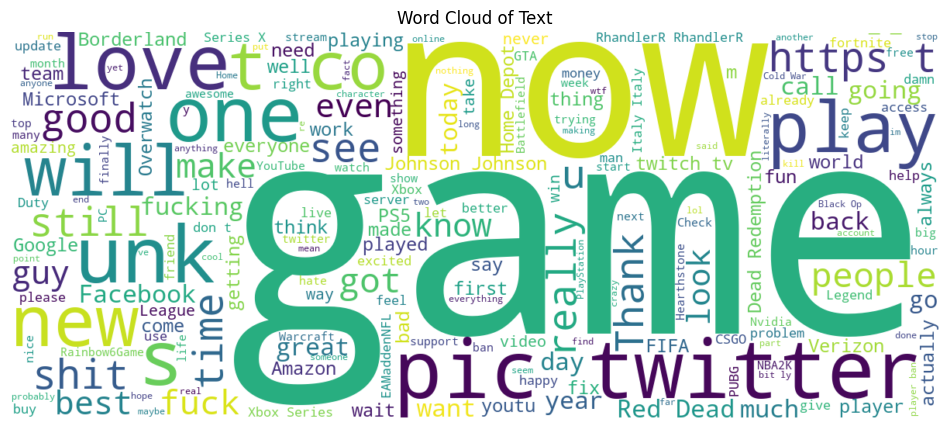

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

cols = ['ID', 'Topic', 'Sentiment', 'Text']
df = pd.read_csv(r"C:\Users\avina\Downloads\twitter_training.csv", names=cols)

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Sentiment Distribution')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(x='Topic', data=df, hue='Sentiment', palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Sentiment Distribution by Topic')
plt.show()

df['msg_len'] = df['Text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['msg_len'], bins=25, kde=True, color='purple')
plt.title('Message Length Distribution')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.xlim(0, 300)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='msg_len', data=df, palette='Set2')
plt.title('Message Length by Sentiment')
plt.ylim(0, 300)
plt.show()

topic_sentiment = pd.crosstab(index=df['Topic'], columns=df['Sentiment'])
plt.figure(figsize=(10, 8))
sns.heatmap(topic_sentiment, annot=True, cmap='YlGnBu', fmt='d', linewidths=.5)
plt.title('Heatmap of Topic vs Sentiment')
plt.show()

topic_list = ' '.join(df['Topic'])
wc = WordCloud(width=1000, height=500, background_color='white', colormap='plasma').generate(topic_list)
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Topics')
plt.show()

text_corpus = ' '.join(df['Text'])
wc2 = WordCloud(width=1200, height=500, background_color='white', colormap='viridis').generate(text_corpus)
plt.figure(figsize=(12, 6))
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text')
plt.show()